In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# Retrieve data

In [2]:
data = pd.read_excel("data.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4943 non-null   datetime64[ns]
 1   metered_price          4923 non-null   float64       
 2   upfront_price          3409 non-null   float64       
 3   distance               4943 non-null   int64         
 4   duration               4943 non-null   int64         
 5   gps_accuracy           4943 non-null   int64         
 6   entered_by             4943 non-null   object        
 7   ride_state             4943 non-null   object        
 8   dest_change_number     4943 non-null   int64         
 9   prediction_price_type  4923 non-null   object        
 10  predicted_distance     4923 non-null   float64       
 11  predicted_duration     4923 non-null   float64       
 12  change_reason_pricing  298 non-null    object        
 13  rid

In [3]:
data.head()

,Date,metered_price,upfront_price,distance,duration,gps_accuracy,entered_by,ride_state,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,rider_app_version,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,2020-02-02 03:37:30.573,4.04,10.0,2839,700,1,client,finished,1,upfront,13384.0,1091.0,NaN,CI.4.17,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,2020-02-08 02:26:18.924,6.09,3.6,5698,493,1,client,finished,1,upfront,2286.0,360.0,NaN,CA.5.43,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,2020-02-08 11:50:35.423,4.32,3.5,4426,695,1,client,finished,1,upfront,4101.0,433.0,NaN,CA.5.43,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,2020-02-05 06:34:53.782,72871.72,NaN,49748,1400,0,client,finished,2,upfront_destination_changed,3017.0,600.0,client_destination_changed,CA.5.23,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,2020-02-13 17:31:23.996,20032.50,19500.0,10273,5067,1,client,finished,1,upfront,14236.0,2778.0,NaN,CA.5.04,DA.4.37,433,Itel W5504,0,0,NaN


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
metered_price,4923.0,7998.471296,15815.850352,2.0,5.38,13.35,10991.67,194483.52
upfront_price,3409.0,4160.095747,17015.711912,2.0,4.20,6.60,4000.00,595000.00
distance,4943.0,9769.223144,10912.426401,0.0,3785.50,7140.00,11953.00,233190.00
duration,4943.0,1566.230629,1650.329858,0.0,604.00,1054.00,1929.50,22402.00
gps_accuracy,4943.0,0.800728,0.399493,0.0,1.00,1.00,1.00,1.00
dest_change_number,4943.0,1.119361,0.499611,1.0,1.00,1.00,1.00,12.00
predicted_distance,4923.0,8822.636807,10548.801733,0.0,4130.50,6918.00,10674.00,353538.00
predicted_duration,4923.0,1106.737355,806.098535,0.0,597.50,939.00,1427.00,20992.00
driver_device_uid_new,4943.0,1093.311349,626.408069,0.0,561.50,1088.00,1643.00,2158.00
eu_indicator,4943.0,0.560388,0.496390,0.0,0.00,1.00,1.00,1.00


In [5]:
data.corr()

,metered_price,upfront_price,distance,duration,gps_accuracy,dest_change_number,predicted_distance,predicted_duration,driver_device_uid_new,eu_indicator,overpaid_ride_ticket,fraud_score
metered_price,1.000000,0.420772,0.539338,0.536198,-0.403957,-0.036261,0.259371,0.448668,-0.027712,-0.568434,0.235677,-0.014472
upfront_price,0.420772,1.000000,0.167040,0.238937,-0.206987,0.051178,0.715542,0.746837,-0.026669,-0.413250,0.123028,-0.075351
distance,0.539338,0.167040,1.000000,0.522302,-0.211084,0.175893,0.598392,0.544905,-0.070007,-0.087481,0.116946,0.069908
duration,0.536198,0.238937,0.522302,1.000000,-0.329022,0.156394,0.357255,0.523966,-0.008866,-0.351428,0.099769,0.038757
gps_accuracy,-0.403957,-0.206987,-0.211084,-0.329022,1.000000,-0.048085,-0.103470,-0.246450,0.021836,0.433647,-0.268944,-0.026592
dest_change_number,-0.036261,0.051178,0.175893,0.156394,-0.048085,1.000000,0.085040,0.044324,-0.016302,0.104739,-0.037315,0.027714
predicted_distance,0.259371,0.715542,0.598392,0.357255,-0.103470,0.085040,1.000000,0.863098,-0.045047,-0.093982,0.024945,0.064431
predicted_duration,0.448668,0.746837,0.544905,0.523966,-0.246450,0.044324,0.863098,1.000000,-0.034281,-0.348380,0.105477,0.059157
driver_device_uid_new,-0.027712,-0.026669,-0.070007,-0.008866,0.021836,-0.016302,-0.045047,-0.034281,1.000000,-0.049562,-0.006997,-0.021323
eu_indicator,-0.568434,-0.413250,-0.087481,-0.351428,0.433647,0.104739,-0.093982,-0.348380,-0.049562,1.000000,-0.284373,0.006967


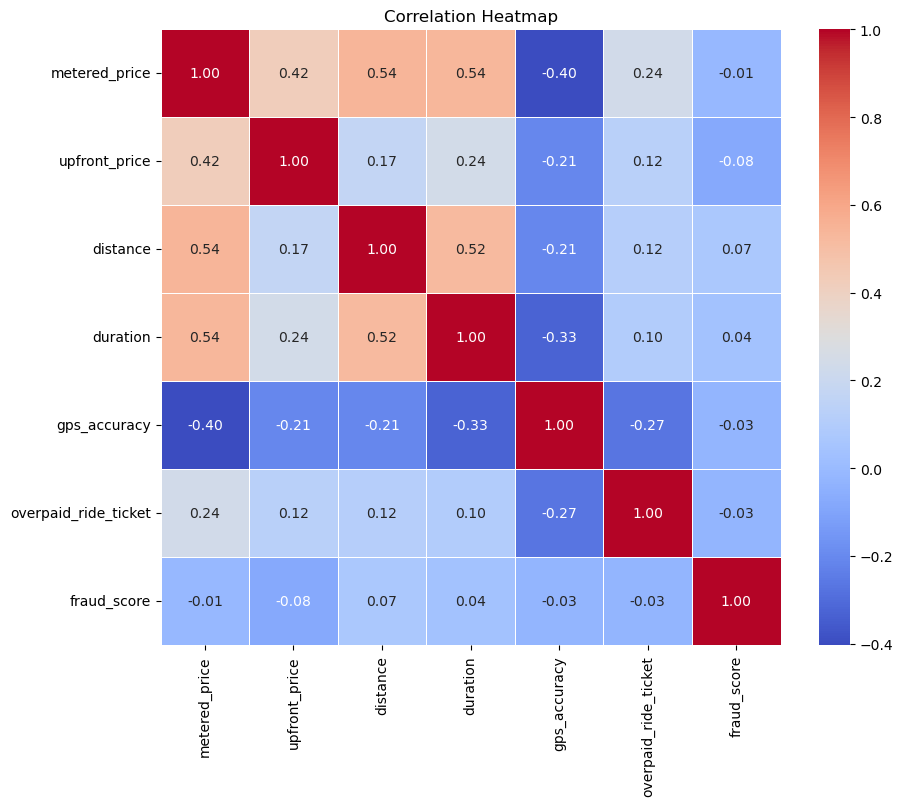

In [6]:
#selected features
selected_columns = ['metered_price', 'upfront_price', 'distance', 'duration', 
                    'gps_accuracy', 'overpaid_ride_ticket', 'fraud_score']

# Create a correlation matrix
correlation_matrix = data[selected_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# select features
columns_to_convert = ['metered_price', 'upfront_price', 'predicted_distance', 'predicted_duration', 'fraud_score']
# Convert float columns to integer
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce', downcast='integer')

In [12]:
# Calculate pricing accuracy (how often upfront pricing matches metered price)
data['pricing_accuracy'] = (data['metered_price'] == data['upfront_price'])
accuracy_percentage = (data['pricing_accuracy'].sum() / len(data)) * 100

# Calculate pricing deviation (percentage difference between upfront and metered prices)
data['pricing_deviation'] = ((data['upfront_price'] - data['metered_price']) / data['metered_price']).abs() * 100
average_deviation = data['pricing_deviation'].mean()


# Print the calculated metrics
print(f"Pricing Accuracy: {accuracy_percentage:.2f}%")
print(f"Average Pricing Deviation: {average_deviation:.2f}%")

Pricing Accuracy: 3.54%
Average Pricing Deviation: 31.10%


In [14]:
# Count of Pricing Accuracy Categories
pricing_accuracy_counts = data.groupby('pricing_accuracy').agg({'pricing_accuracy': ['count']}).reset_index()
pricing_accuracy_counts

pricing_accuracy      
                   count
0            False  4768
1             True   175

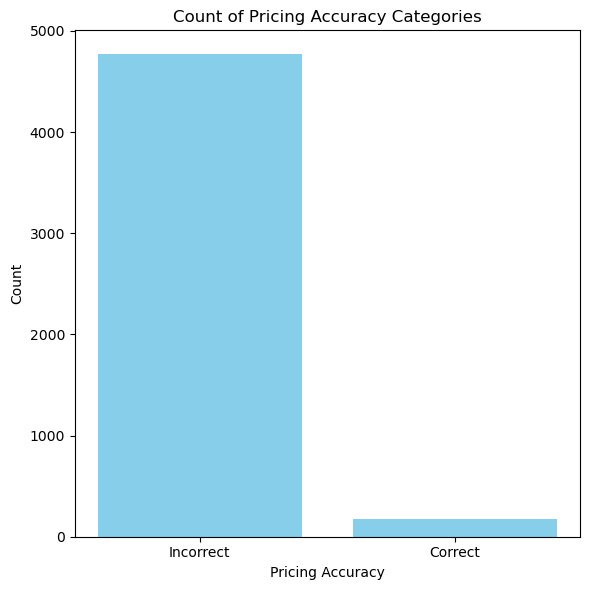

In [16]:
# Rename the columns for clarity
pricing_accuracy_counts.columns = ['Pricing Accuracy', 'Count']

# Plotting the bar chart
plt.figure(figsize=(6, 6))
plt.bar(pricing_accuracy_counts['Pricing Accuracy'], pricing_accuracy_counts['Count'], color='skyblue')
plt.xlabel('Pricing Accuracy')
plt.ylabel('Count')
plt.title('Count of Pricing Accuracy Categories')
plt.xticks(ticks=[0, 1], labels=['Incorrect', 'Correct'])  # Assuming 0 represents incorrect and 1 represents correct
plt.tight_layout()
plt.show()

In [25]:
data.columns

Index(['Date', 'metered_price', 'upfront_price', 'distance', 'duration',
       'gps_accuracy', 'entered_by', 'ride_state', 'dest_change_number',
       'prediction_price_type', 'predicted_distance', 'predicted_duration',
       'change_reason_pricing', 'rider_app_version', 'driver_app_version',
       'driver_device_uid_new', 'device_name', 'eu_indicator',
       'overpaid_ride_ticket', 'fraud_score', 'pricing_accuracy',
       'pricing_deviation'],
      dtype='object')

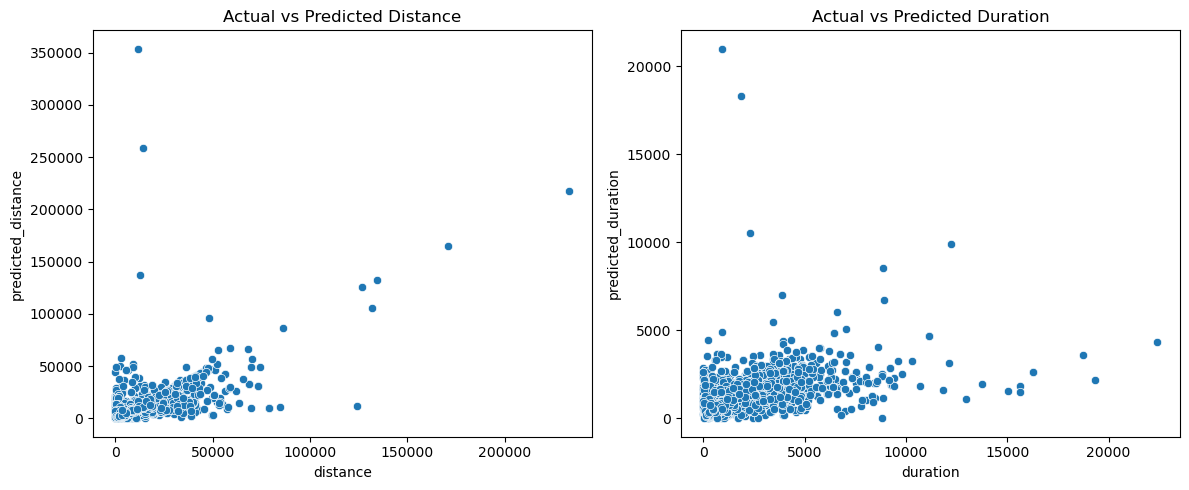

In [27]:
# Create scatter plots for distance and predicted_distance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['distance'], y=data['predicted_distance'])
plt.title('Actual vs Predicted Distance')

# Create scatter plots for duration and predicted_duration
plt.subplot(1, 2, 2)
sns.scatterplot(x=data['duration'], y=data['predicted_duration'])
plt.title('Actual vs Predicted Duration')

plt.tight_layout()
plt.show()

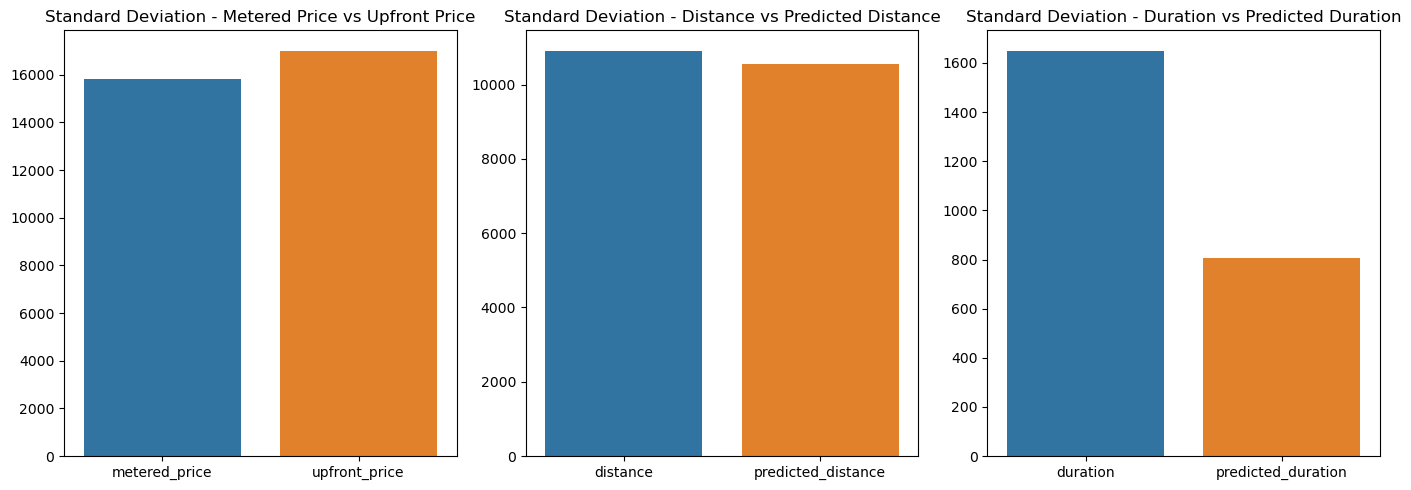

In [31]:
metered_price = 'metered_price'
upfront_price = 'upfront_price'
distance = 'distance'
predicted_distance = 'predicted_distance'
duration = 'duration'
predicted_duration = 'predicted_duration'

# Calculate standard deviations
std_metered_upfront = data[[metered_price, upfront_price]].std()
std_distance_predicted = data[[distance, predicted_distance]].std()
std_duration_predicted = data[[duration, predicted_duration]].std()

# Plot standard deviations
plt.figure(figsize=(14, 5))

# Standard deviation plot for 'metered_price' and 'upfront_price'
plt.subplot(1, 3, 1)
sns.barplot(x=std_metered_upfront.index, y=std_metered_upfront.values)
plt.title('Standard Deviation - Metered Price vs Upfront Price')

# Standard deviation plot for 'distance' and 'predicted_distance'
plt.subplot(1, 3, 2)
sns.barplot(x=std_distance_predicted.index, y=std_distance_predicted.values)
plt.title('Standard Deviation - Distance vs Predicted Distance')

# Standard deviation plot for 'duration' and 'predicted_duration'
plt.subplot(1, 3, 3)
sns.barplot(x=std_duration_predicted.index, y=std_duration_predicted.values)
plt.title('Standard Deviation - Duration vs Predicted Duration')

plt.tight_layout()
plt.show()

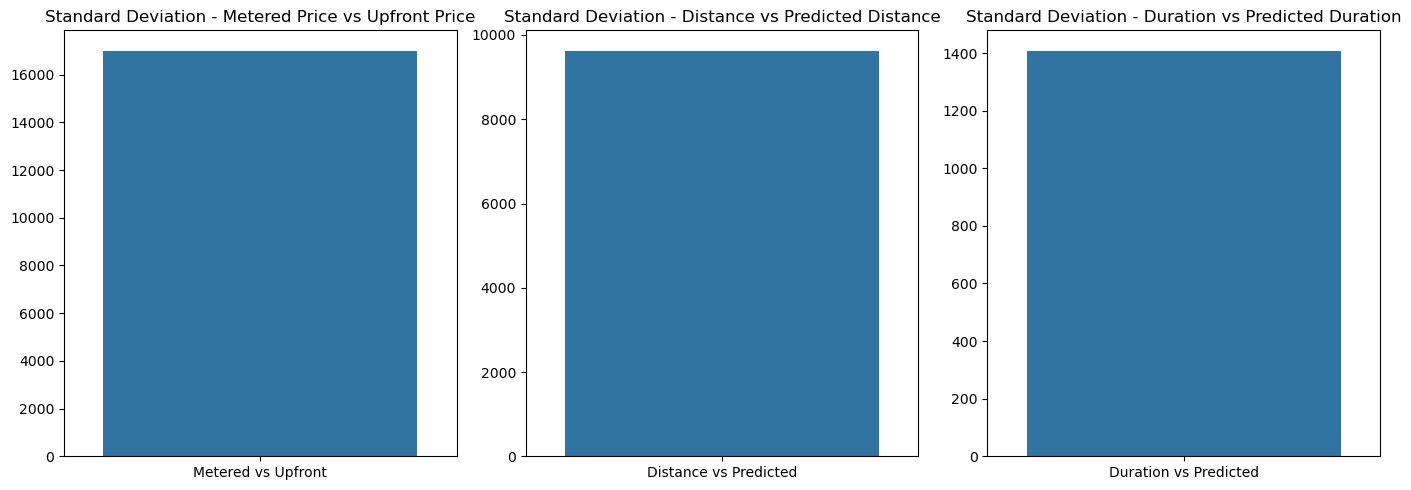

In [34]:
# Assuming your DataFrame is named 'data'
# Replace these with the actual column names from your dataset
metered_price = 'metered_price'
upfront_price = 'upfront_price'
distance = 'distance'
predicted_distance = 'predicted_distance'
duration = 'duration'
predicted_duration = 'predicted_duration'

# Calculate the differences between corresponding values
diff_metered_upfront = data[metered_price] - data[upfront_price]
diff_distance_predicted = data[distance] - data[predicted_distance]
diff_duration_predicted = data[duration] - data[predicted_duration]

# Calculate standard deviations of the differences
std_diff_metered_upfront = diff_metered_upfront.std()
std_diff_distance_predicted = diff_distance_predicted.std()
std_diff_duration_predicted = diff_duration_predicted.std()

# Plot standard deviations of the differences
plt.figure(figsize=(14, 5))

# Standard deviation plot for the differences between 'metered_price' and 'upfront_price'
plt.subplot(1, 3, 1)
sns.barplot(x=['Metered vs Upfront'], y=[std_diff_metered_upfront])
plt.title('Standard Deviation - Metered Price vs Upfront Price')

# Standard deviation plot for the differences between 'distance' and 'predicted_distance'
plt.subplot(1, 3, 2)
sns.barplot(x=['Distance vs Predicted'], y=[std_diff_distance_predicted])
plt.title('Standard Deviation - Distance vs Predicted Distance')

# Standard deviation plot for the differences between 'duration' and 'predicted_duration'
plt.subplot(1, 3, 3)
sns.barplot(x=['Duration vs Predicted'], y=[std_diff_duration_predicted])
plt.title('Standard Deviation - Duration vs Predicted Duration')

plt.tight_layout()
plt.show()


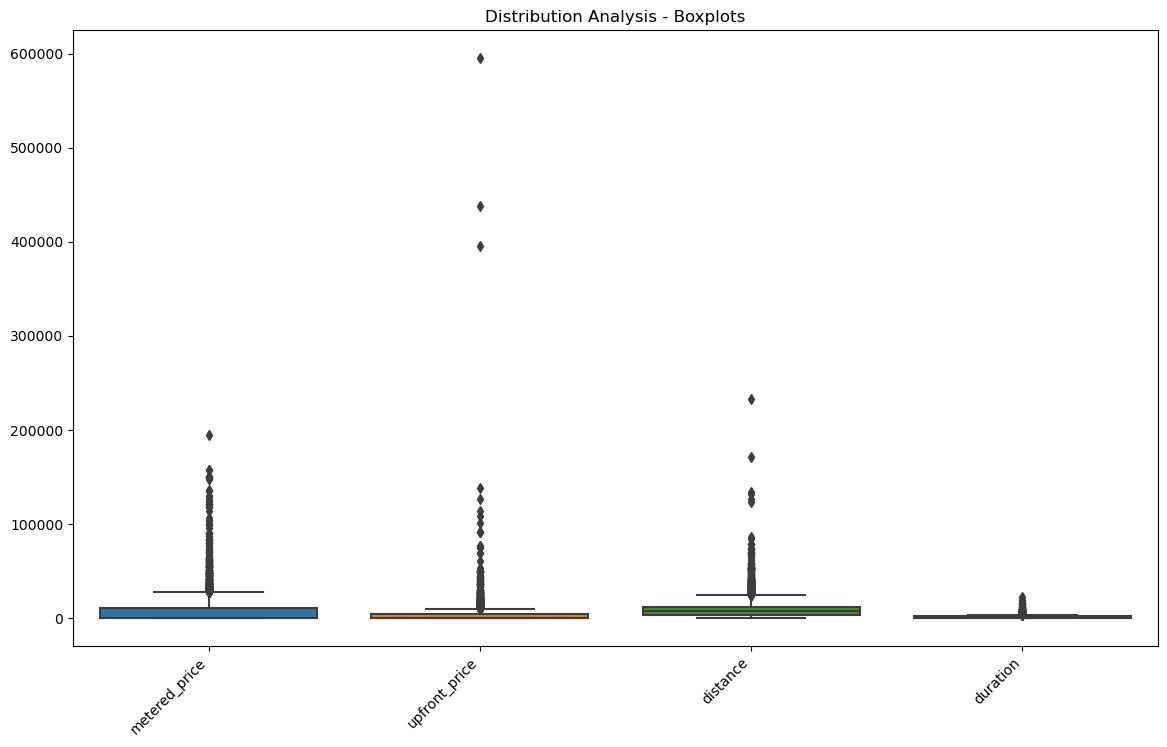

In [24]:
selected_columns = ['metered_price', 'upfront_price', 'distance', 'duration']

# Create a boxplot for each selected column
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[selected_columns])
plt.title('Distribution Analysis - Boxplots')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

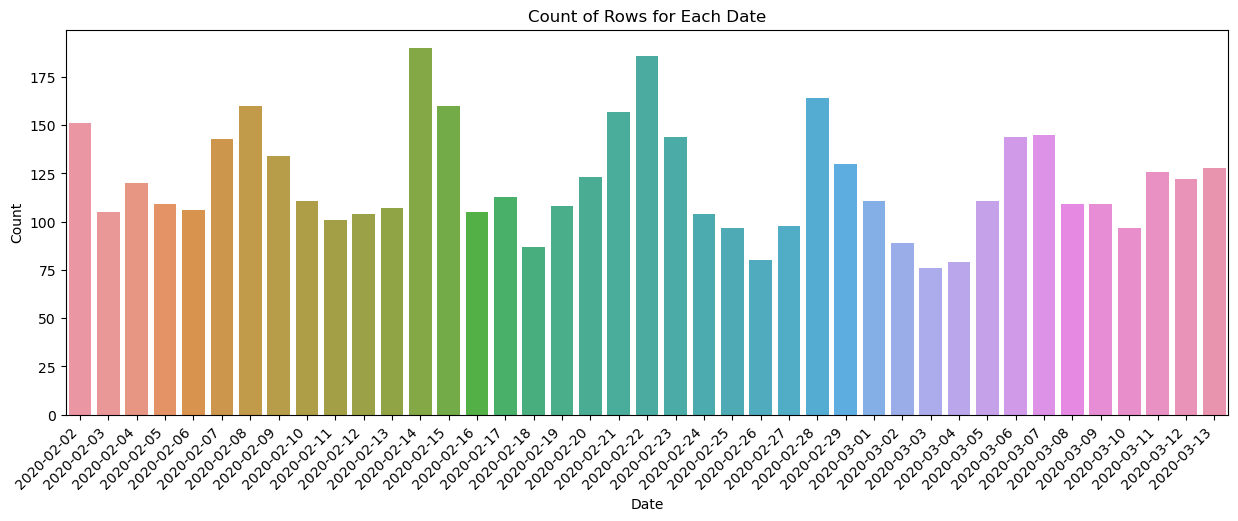

In [35]:
# Extract date from the timestamp and create a new column 'DateOnly'
data['DateOnly'] = data['Date'].dt.date

# Count the number of rows for each date
date_counts = data['DateOnly'].value_counts().sort_index()

# Plot the count of rows for each date
plt.figure(figsize=(15, 5))
sns.barplot(x=date_counts.index, y=date_counts.values)
plt.title('Count of Rows for Each Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

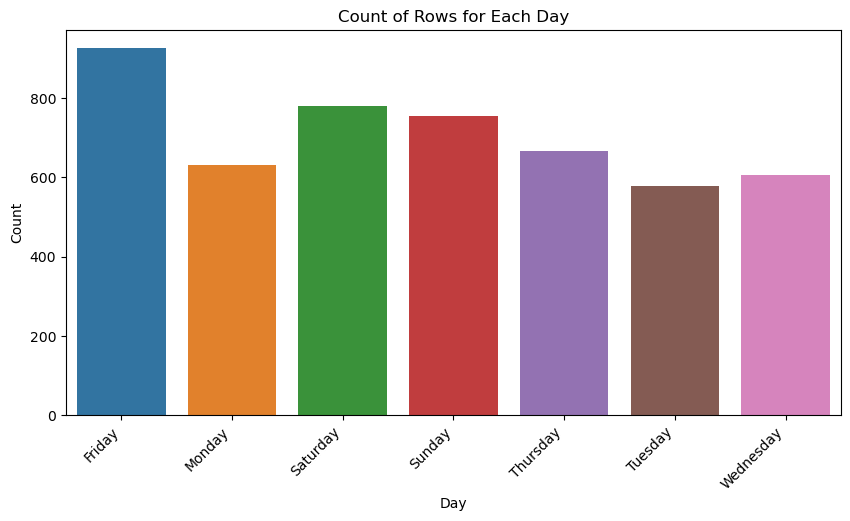

In [36]:
# Extract day name from the timestamp and create a new column 'Day'
data['Day'] = data['Date'].dt.day_name()

# Count the number of rows for each day
day_counts = data['Day'].value_counts().sort_index()

# Plot the count of rows for each day
plt.figure(figsize=(10, 5))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title('Count of Rows for Each Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

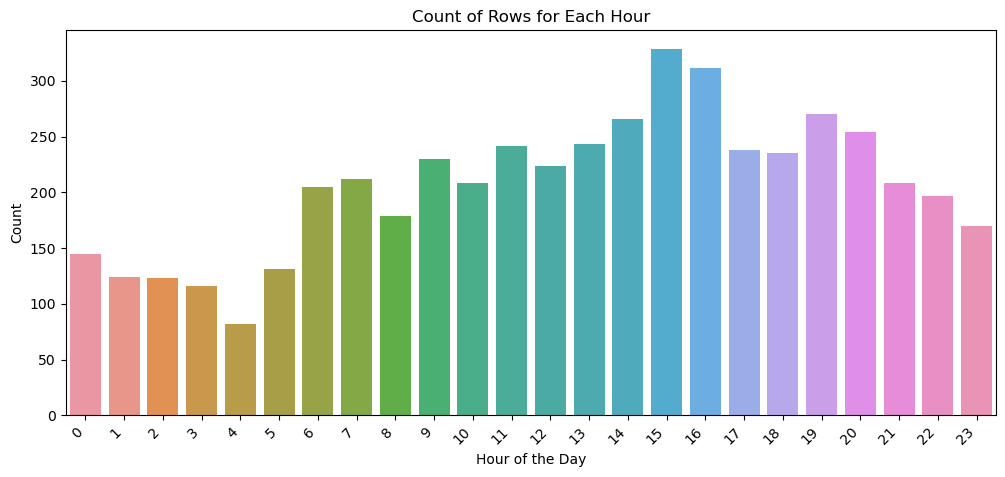

In [37]:
# Extract hour from the timestamp and create a new column 'Hour'
data['Hour'] = data['Date'].dt.hour

# Count the number of rows for each hour
hour_counts = data['Hour'].value_counts().sort_index()

# Plot the count of rows for each hour
plt.figure(figsize=(12, 5))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title('Count of Rows for Each Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

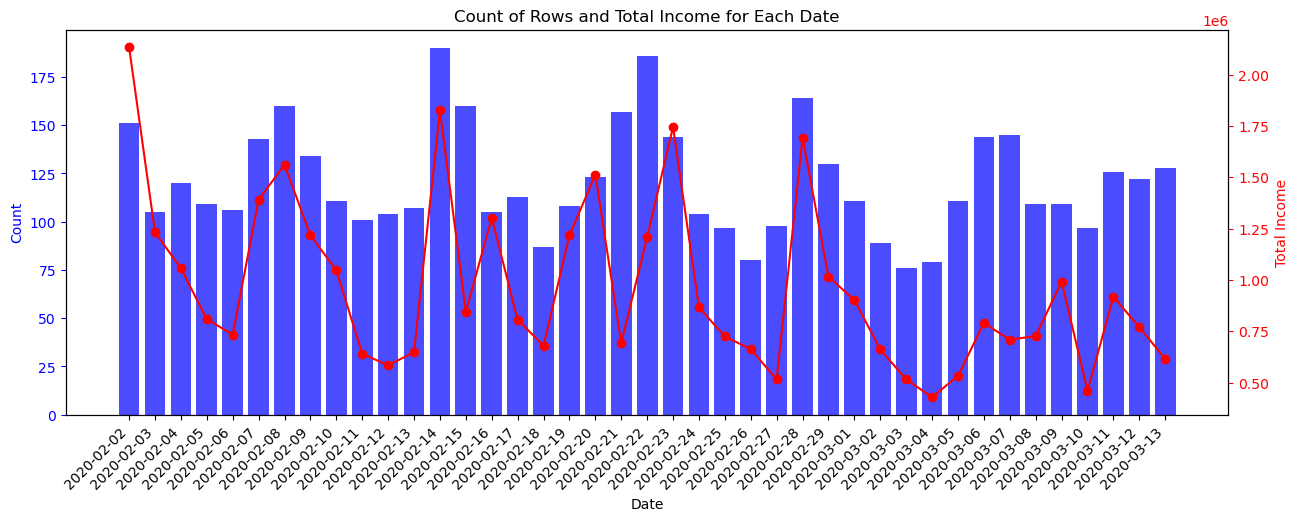

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data' and it has a 'Date' column
# If not, replace 'Date' with the actual column name representing the timestamp
date_column = 'Date'
income_column = 'metered_price'

# Extract date from the timestamp and create a new column 'DateOnly'
data['DateOnly'] = data[date_column].dt.date

# Calculate total income for each date
total_income = data.groupby('DateOnly')[income_column].sum().sort_index()

# Count the number of rows for each date
date_counts = data['DateOnly'].value_counts().sort_index()

# Convert the index to datetime
date_counts.index = pd.to_datetime(date_counts.index)

# Plot the count of rows and total income for each date
fig, ax1 = plt.subplots(figsize=(15, 5))

# Bar plot for the count of rows
ax1.bar(date_counts.index, date_counts.values, color='b', alpha=0.7, label='Count of Rows')
ax1.set_xlabel('Date')
ax1.set_ylabel('Count', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticks(date_counts.index)
ax1.set_xticklabels(date_counts.index.strftime('%Y-%m-%d'), rotation=45, ha='right')  # Format date for better readability

# Create a second y-axis to show total income
ax2 = ax1.twinx()
ax2.plot(total_income.index, total_income.values, color='r', label='Total Income', marker='o')
ax2.set_ylabel('Total Income', color='r')
ax2.tick_params('y', colors='r')

plt.title('Count of Rows and Total Income for Each Date')
plt.show()


In [44]:
data.columns

Index(['Date', 'metered_price', 'upfront_price', 'distance', 'duration',
       'gps_accuracy', 'entered_by', 'ride_state', 'dest_change_number',
       'prediction_price_type', 'predicted_distance', 'predicted_duration',
       'change_reason_pricing', 'rider_app_version', 'driver_app_version',
       'driver_device_uid_new', 'device_name', 'eu_indicator',
       'overpaid_ride_ticket', 'fraud_score', 'pricing_accuracy',
       'pricing_deviation', 'distance_difference', 'duration_difference',
       'DateOnly', 'Day', 'Hour'],
      dtype='object')

In [49]:
data.head()

,Date,metered_price,upfront_price,distance,duration,gps_accuracy,entered_by,ride_state,dest_change_number,prediction_price_type,...,eu_indicator,overpaid_ride_ticket,fraud_score,pricing_accuracy,pricing_deviation,distance_difference,duration_difference,DateOnly,Day,Hour
0,2020-02-02 03:37:30.573,4.04,10.0,2839,700,1,client,finished,1,upfront,...,1,0,-1383.0,False,147.524752,10545.0,391.0,2020-02-02,Sunday,3
1,2020-02-08 02:26:18.924,6.09,3.6,5698,493,1,client,finished,1,upfront,...,1,0,NaN,False,40.886700,3412.0,133.0,2020-02-08,Saturday,2
2,2020-02-08 11:50:35.423,4.32,3.5,4426,695,1,client,finished,1,upfront,...,1,0,-166.0,False,18.981481,325.0,262.0,2020-02-08,Saturday,11
3,2020-02-05 06:34:53.782,72871.72,NaN,49748,1400,0,client,finished,2,upfront_destination_changed,...,0,1,NaN,False,NaN,46731.0,800.0,2020-02-05,Wednesday,6
4,2020-02-13 17:31:23.996,20032.50,19500.0,10273,5067,1,client,finished,1,upfront,...,0,0,NaN,False,2.658180,3963.0,2289.0,2020-02-13,Thursday,17


In [48]:
data.corr()

,metered_price,upfront_price,distance,duration,gps_accuracy,dest_change_number,predicted_distance,predicted_duration,driver_device_uid_new,eu_indicator,overpaid_ride_ticket,fraud_score,pricing_accuracy,pricing_deviation,distance_difference,duration_difference,Hour
metered_price,1.000000,0.420772,0.539338,0.536198,-0.403957,-0.036261,0.259371,0.448668,-0.027712,-0.568434,0.235677,-0.014472,-0.072104,0.071012,0.382136,0.417201,0.048797
upfront_price,0.420772,1.000000,0.167040,0.238937,-0.206987,0.051178,0.715542,0.746837,-0.026669,-0.413250,0.123028,-0.075351,-0.028727,0.719048,0.774867,0.548440,0.041982
distance,0.539338,0.167040,1.000000,0.522302,-0.211084,0.175893,0.598392,0.544905,-0.070007,-0.087481,0.116946,0.069908,-0.136860,-0.022763,0.389134,0.244414,0.006252
duration,0.536198,0.238937,0.522302,1.000000,-0.329022,0.156394,0.357255,0.523966,-0.008866,-0.351428,0.099769,0.038757,-0.143441,-0.000319,0.200843,0.827771,0.017504
gps_accuracy,-0.403957,-0.206987,-0.211084,-0.329022,1.000000,-0.048085,-0.103470,-0.246450,0.021836,0.433647,-0.268944,-0.026592,0.065425,-0.116275,-0.208388,-0.291284,-0.010002
dest_change_number,-0.036261,0.051178,0.175893,0.156394,-0.048085,1.000000,0.085040,0.044324,-0.016302,0.104739,-0.037315,0.027714,-0.045775,0.073572,0.148597,0.156480,-0.023927
predicted_distance,0.259371,0.715542,0.598392,0.357255,-0.103470,0.085040,1.000000,0.863098,-0.045047,-0.093982,0.024945,0.064431,-0.117299,0.618644,0.583363,0.349353,0.022126
predicted_duration,0.448668,0.746837,0.544905,0.523966,-0.246450,0.044324,0.863098,1.000000,-0.034281,-0.348380,0.105477,0.059157,-0.171829,0.560669,0.551729,0.455106,0.054430
driver_device_uid_new,-0.027712,-0.026669,-0.070007,-0.008866,0.021836,-0.016302,-0.045047,-0.034281,1.000000,-0.049562,-0.006997,-0.021323,0.018269,-0.009693,-0.050590,0.002496,0.011385
eu_indicator,-0.568434,-0.413250,-0.087481,-0.351428,0.433647,0.104739,-0.093982,-0.348380,-0.049562,1.000000,-0.284373,0.006967,0.024112,-0.143531,-0.170538,-0.338513,-0.066724


In [68]:
dataset = data[['metered_price', 'upfront_price', 'distance', 'duration', 'predicted_distance', 'predicted_duration']]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   metered_price       4923 non-null   float64
 1   upfront_price       3409 non-null   float64
 2   distance            4943 non-null   int64  
 3   duration            4943 non-null   int64  
 4   predicted_distance  4923 non-null   float64
 5   predicted_duration  4923 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 231.8 KB


In [69]:
dataset.head(3)

,metered_price,upfront_price,distance,duration,predicted_distance,predicted_duration
0,4.04,10.0,2839,700,13384.0,1091.0
1,6.09,3.6,5698,493,2286.0,360.0
2,4.32,3.5,4426,695,4101.0,433.0


In [70]:
dataset.describe()

,metered_price,upfront_price,distance,duration,predicted_distance,predicted_duration
count,4923.000000,3409.000000,4943.000000,4943.000000,4923.000000,4923.000000
mean,7998.471296,4160.095747,9769.223144,1566.230629,8822.636807,1106.737355
std,15815.850352,17015.711912,10912.426401,1650.329858,10548.801733,806.098535
min,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,5.380000,4.200000,3785.500000,604.000000,4130.500000,597.500000
50%,13.350000,6.600000,7140.000000,1054.000000,6918.000000,939.000000
75%,10991.670000,4000.000000,11953.000000,1929.500000,10674.000000,1427.000000
max,194483.520000,595000.000000,233190.000000,22402.000000,353538.000000,20992.000000


In [71]:
dataset.isna().sum()

metered_price           20
upfront_price         1534
distance                 0
duration                 0
predicted_distance      20
predicted_duration      20
dtype: int64

In [72]:
# Impute missing values with median for numeric features
nanvalue_features = ['metered_price','upfront_price', 'predicted_distance', 'predicted_duration']
dataset[nanvalue_features] = dataset[nanvalue_features].fillna(dataset[nanvalue_features].median())

In [73]:
dataset.duplicated().sum()

777

In [74]:
# Remove duplicated rows
dataset = dataset.drop_duplicates()

# Verify the changes
print("Shape after removing duplicates:", dataset.shape)

Shape after removing duplicates: (4166, 6)


In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4166 entries, 0 to 4941
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   metered_price       4166 non-null   float64
 1   upfront_price       4166 non-null   float64
 2   distance            4166 non-null   int64  
 3   duration            4166 non-null   int64  
 4   predicted_distance  4166 non-null   float64
 5   predicted_duration  4166 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 227.8 KB


In [81]:
dataset.head()

,metered_price,upfront_price,distance,duration,predicted_distance,predicted_duration
0,4.04,10.0,2839,700,13384.0,1091.0
1,6.09,3.6,5698,493,2286.0,360.0
2,4.32,3.5,4426,695,4101.0,433.0
3,72871.72,6.6,49748,1400,3017.0,600.0
4,20032.50,19500.0,10273,5067,14236.0,2778.0


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [77]:
# Step 1: Split the data
X = dataset[['upfront_price', 'distance', 'duration', 'predicted_distance', 'predicted_duration']]
y = dataset['metered_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Step 2: Build multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [79]:
# Step 3: Model training and Step 4: Model evaluation
best_model = None
best_score = float('inf')  # Initialize with a large value

for model_name, model in models.items():
    # Training
    model.fit(X_train, y_train)

    # Prediction
    y_pred = model.predict(X_test)

    # Evaluation using Mean Squared Error (you can choose a different metric based on your preference)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{model_name} Mean Squared Error: {mse}')

    # Step 5: Feature importance analysis (for models that support it)
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        print(f'{model_name} Feature Importances:', feature_importances)

    # Step 6: Save the best model based on the lowest Mean Squared Error
    if mse < best_score:
        best_score = mse
        best_model = model
        print(f'{model_name} is the new best model!')

Linear Regression Mean Squared Error: 113641733.78510526
Linear Regression is the new best model!
Ridge Regression Mean Squared Error: 113641733.7994638
Lasso Regression Mean Squared Error: 113641737.63912898
Decision Tree Mean Squared Error: 81016259.15946439
Decision Tree Feature Importances: [0.19105632 0.29883508 0.36489438 0.07213603 0.07307819]
Decision Tree is the new best model!
Random Forest Mean Squared Error: 48735617.67270667
Random Forest Feature Importances: [0.19557067 0.29079671 0.37675922 0.06979227 0.06708114]
Random Forest is the new best model!
Gradient Boosting Mean Squared Error: 52370073.770536065
Gradient Boosting Feature Importances: [0.27609668 0.28888729 0.32338813 0.05127321 0.06035469]


In [80]:
# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Mean Squared Error'])

# Step 3: Model training and Step 4: Model evaluation
best_model = None
best_score = float('inf')  # Initialize with a large value

for model_name, model in models.items():
    # Training
    model.fit(X_train, y_train)

    # Prediction
    y_pred = model.predict(X_test)

    # Evaluation using Mean Squared Error (you can choose a different metric based on your preference)
    mse = mean_squared_error(y_test, y_pred)

    # Step 5: Feature importance analysis (for models that support it)
    feature_importances = None
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_

    # Save the results in the DataFrame
    results_df = results_df.append({'Model': model_name, 'Mean Squared Error': mse, 'Feature Importances': feature_importances}, ignore_index=True)

    # Step 6: Save the best model based on the lowest Mean Squared Error
    if mse < best_score:
        best_score = mse
        best_model = model

# Display the results DataFrame
results_df

,Model,Mean Squared Error,Feature Importances
0,Linear Regression,1.136417e+08,None
1,Ridge Regression,1.136417e+08,None
2,Lasso Regression,1.136417e+08,None
3,Decision Tree,7.706896e+07,"[0.19094616718898963, 0.2969926786655944, 0.36..."
4,Random Forest,4.533734e+07,"[0.20727253440750887, 0.2981094580184305, 0.36..."
5,Gradient Boosting,5.229612e+07,"[0.2762683099947279, 0.2870460304456112, 0.324..."
